In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns =['Survived']),df['Survived'],test_size=0.2,random_state=2)

In [19]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [20]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [21]:
[X_train['Age_imputed'].isnull()]

[30     False
 10     False
 873    False
 182    False
 876    False
        ...  
 534    False
 584     True
 493    False
 527     True
 168     True
 Name: Age_imputed, Length: 712, dtype: bool]

In [22]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [23]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values # LHS mein i had filterd out the NaN cell and then by selectin the sample from X_train with the help of dropna i am selectin the sample form the X_train
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [24]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values # this are the all values that will be imputed

array([24.  , 18.  , 47.  , 47.  , 34.  , 30.  , 20.  , 16.  , 31.  ,
       35.  , 43.  , 41.  , 28.  , 26.  , 22.  , 23.  , 28.  , 53.  ,
       36.  , 33.  , 33.  , 19.  , 47.  , 27.  , 36.  , 18.  , 33.  ,
       31.  , 24.  ,  9.  , 38.  , 42.  ,  2.  , 12.  , 60.  , 15.  ,
       19.  , 62.  , 71.  , 71.  , 26.  , 24.  , 35.  , 65.  , 24.  ,
       35.  , 18.  , 22.  , 62.  ,  0.42, 29.  , 31.  , 34.  , 56.  ,
       17.  , 35.  ,  8.  , 62.  , 22.  , 24.  , 37.  ,  4.  , 51.  ,
       45.  , 46.  , 22.  , 34.  , 27.  , 45.  , 31.  , 31.  , 40.  ,
       29.  ,  3.  , 23.  ,  9.  , 43.  , 29.  , 33.  , 22.  ,  2.  ,
       22.  , 24.  , 16.  , 30.  , 48.  , 22.  , 16.  , 29.  , 47.  ,
       50.  , 38.  , 49.  , 45.  , 17.  ,  2.  , 20.  , 27.  , 19.  ,
       26.  ,  9.  ,  4.  , 43.  , 16.  , 51.  , 47.  , 20.  , 24.  ,
       49.  , 47.  , 36.  , 54.  , 25.  , 33.  , 18.  , 60.  , 19.  ,
       35.  , 45.5 , 29.  , 27.  , 40.  , 52.  , 27.  , 33.  , 27.  ,
       18.  , 39.  ,

In [25]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,35.0
493,71.0,49.5042,71.0
527,NaN,221.7792,32.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\21376897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label = 'Before Imputed', hist = False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\21376897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['

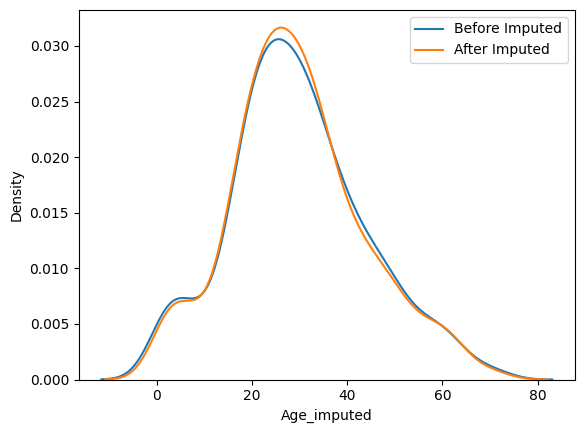

In [26]:
sns.distplot(X_train['Age'],label = 'Before Imputed', hist = False)
sns.distplot(X_train['Age_imputed'],label = 'After Imputed', hist = False)

plt.legend()
plt.show()

In [27]:
print("Original Variance :", X_train['Age'].var())
print("Imputed Variance :", X_train['Age_imputed'].var())


Original Variance : 204.34951339046142
Imputed Variance : 196.27865414414734


In [28]:
X_train.corr()

,Age,Fare,Age_imputed
Age,1.000000,0.095814,1.000000
Fare,0.095814,1.000000,0.082313
Age_imputed,1.000000,0.082313,1.000000


<Axes: >

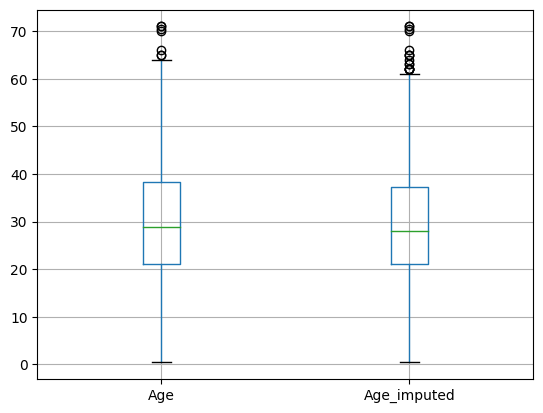

In [29]:
X_train[['Age', 'Age_imputed']].boxplot()

In [30]:
data = pd.read_csv('trainning_data.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [31]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [32]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [33]:
X_train,X_test,y_train,y_test = train_test_split(data,data['SalePrice'],test_size=0.2,random_state=2)

In [34]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [35]:
X_train

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,NaN,TA
504,Fa,TA,147000,Fa,TA
1413,Gd,TA,257000,Gd,TA
1389,Gd,TA,131000,Gd,TA
...,...,...,...,...,...
466,Po,TA,167000,Po,TA
299,Gd,TA,158500,Gd,TA
493,Fa,TA,155000,Fa,TA
527,Gd,TA,446261,Gd,TA


In [36]:
X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\1245818407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\1245818407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\1245818407.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [37]:
X_train['FireplaceQu'].value_counts()

FireplaceQu
Gd    302
TA    252
Fa     25
Po     17
Ex     15
Name: count, dtype: int64

In [38]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
# the ratio are similar which motivates me to use the random imputation

In [39]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [40]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp  # this way i can check the ratio and verify before and afte the imputation

,original,imputed
Gd,0.494272,0.494863
TA,0.412439,0.410103
Fa,0.040917,0.042808
Po,0.027823,0.026541
Ex,0.024550,0.025685


C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\674568557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\674568557.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

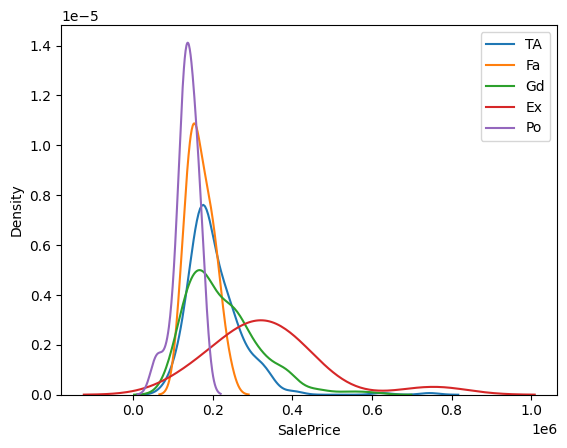

In [46]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\4216822332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\4216822332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

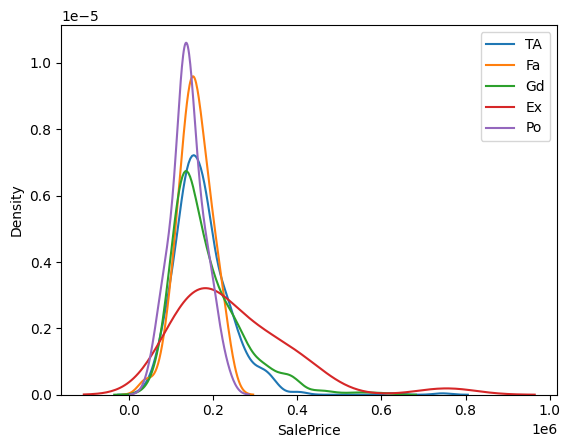

In [43]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

In [125]:
X_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\3737140302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['GarageQual']==category]['SalePrice'], hist = False, label = category)
C:\Users\Hp\AppData\Local\Temp\ipykernel_3136\3737140302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

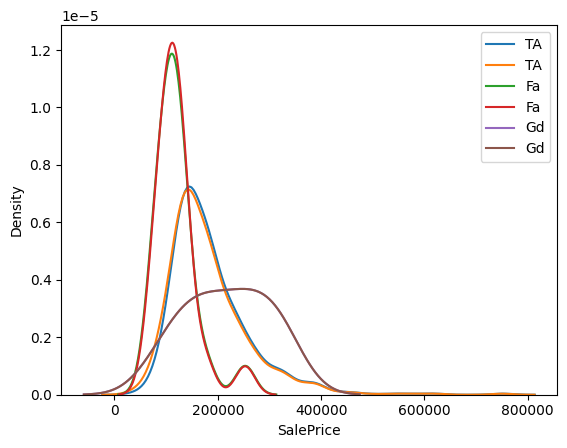

In [44]:
for category in X_train['GarageQual'].dropna().unique():
    sns.distplot(X_train[X_train['GarageQual']==category]['SalePrice'], hist = False, label = category)
    sns.distplot(X_train[X_train['GarageQual_imputed']==category]['SalePrice'], hist = False, label = category)
plt.legend()
plt.show()

In [127]:
X_train['GarageQual'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11284\894450867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['GarageQual_imputed']==category]['SalePrice'], hist = False, label = category)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11284\894450867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

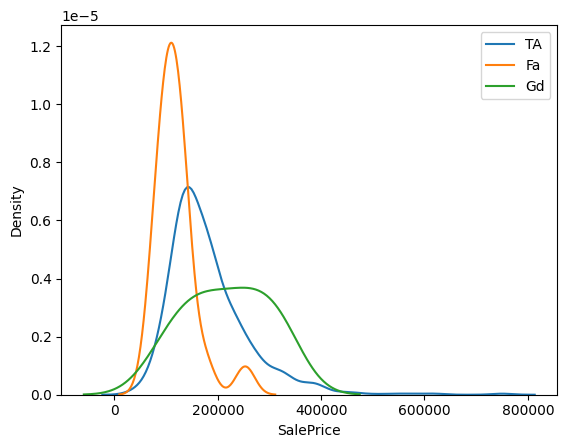

In [128]:
for category in X_train['GarageQual'].dropna().unique():
    sns.distplot(X_train[X_train['GarageQual_imputed']==category]['SalePrice'], hist = False, label = category)
plt.legend()
plt.show()

In [130]:
# the imputation in GarageQua is acceptable but not in FireplaceQU